In [1]:
using CairoMakie
using Statistics

In [2]:
include("io_array.jl")

read_from_csv (generic function with 1 method)

In [3]:
# --- Load and average data ---

input_std_grid = read_from_file("data//appendix//ridge_regression//1_input_std_grid.txt")[:, 1]

lambda_list = ["1e-12", "1e-11", "1e-10", "1e-9", "1e-8"]
r2_av_list = []

for lambda in lambda_list
    r2_data = []
    for seed = 1:20
        filename = "data//appendix//ridge_regression//r2_N=600_lambda=$(lambda)_delay=10_seed=$(seed).txt"
        r2 = read_from_file(filename)[:, 1]
        push!(r2_data, r2)
    end
    r2_data = hcat(r2_data...)
    r2_av = mean(r2_data, dims=2)[:, 1]
    push!(r2_av_list, r2_av)
end

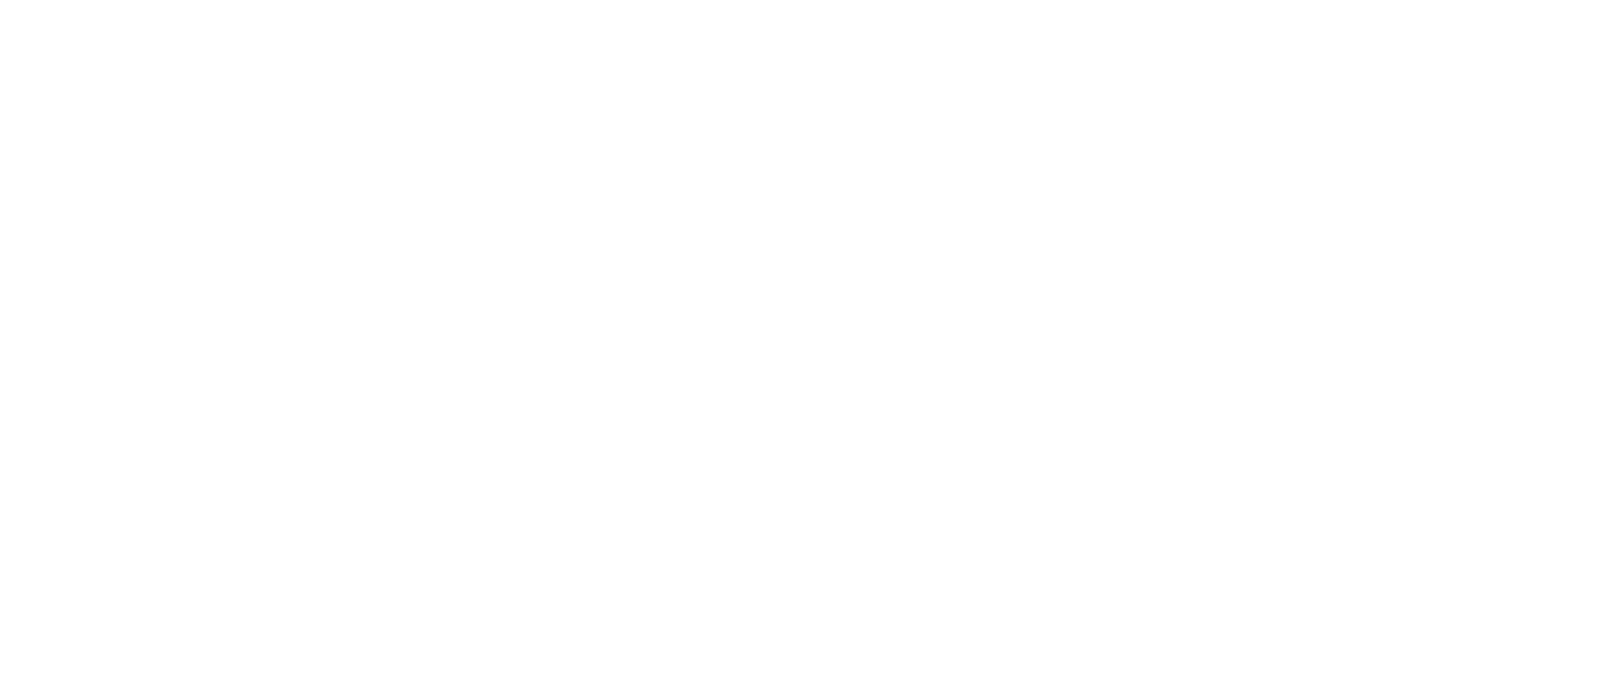

In [4]:
set_theme!(
    fontsize=25,
    Legend=(labelsize=20,),
    Axis=(
        xgridvisible=false,
        ygridvisible=false,
    ),
)

fig = Figure(size=(800, 350))

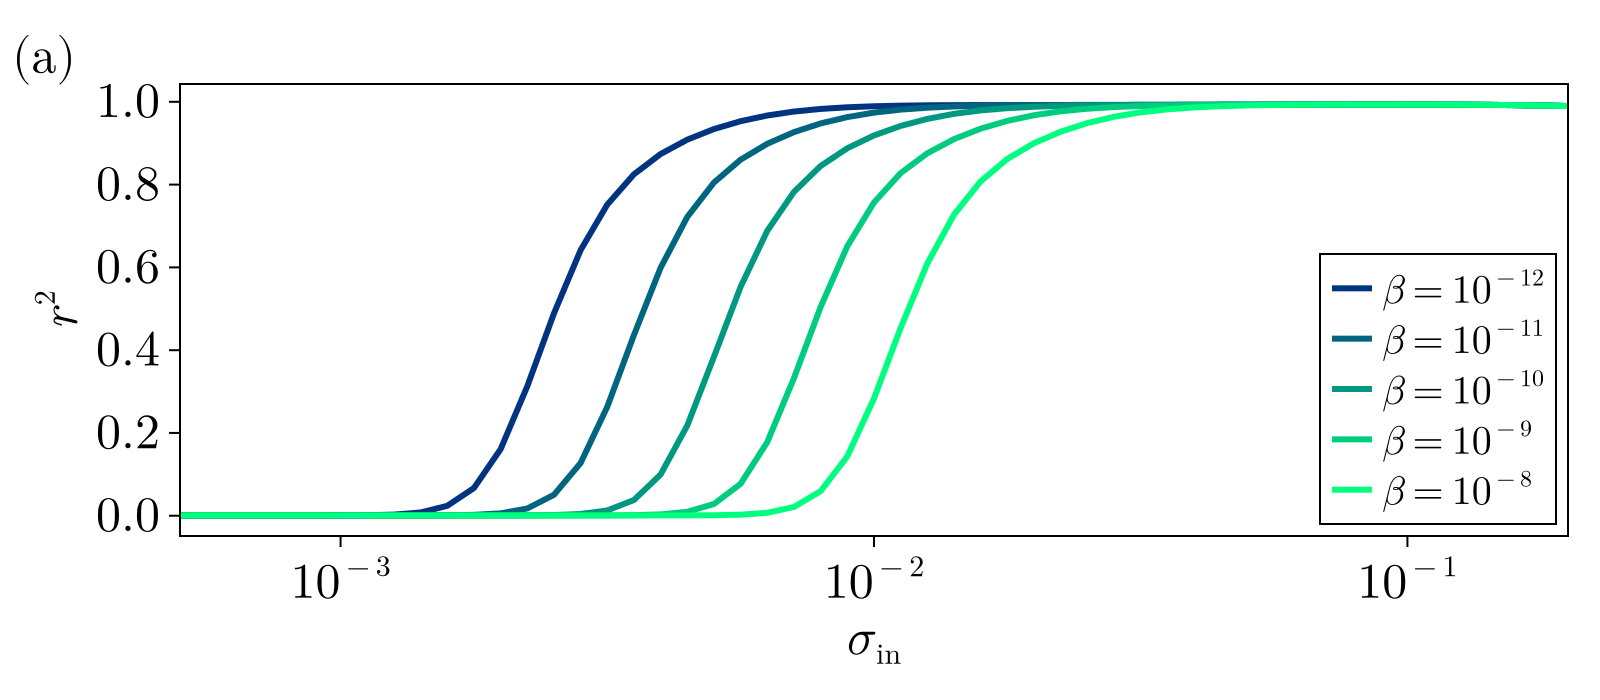

In [5]:
ax = Axis(fig[1, 1];
    xlabel=L"\sigma_{\mathrm{in}}",
    ylabel=L"r^2",
    xscale=log10,
    xticks=([1e-4, 1e-3, 1e-2, 1e-1, 1], [L"10^{-4}", L"10^{-3}", L"10^{-2}", L"10^{-1}", L"1"]),
    yticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]))

xlims!(ax, 5e-4, 0.2)

lines!(ax, input_std_grid, r2_av_list[1], label=L"\beta = 10^{-12}", linewidth=3, color=RGBf(0, 0.2, 0.5))
lines!(ax, input_std_grid, r2_av_list[2], label=L"\beta = 10^{-11}", linewidth=3, color=RGBf(0, 0.4, 0.5))
lines!(ax, input_std_grid, r2_av_list[3], label=L"\beta = 10^{-10}", linewidth=3, color=RGBf(0, 0.6, 0.5))
lines!(ax, input_std_grid, r2_av_list[4], label=L"\beta = 10^{-9}", linewidth=3, color=RGBf(0, 0.8, 0.5))
lines!(ax, input_std_grid, r2_av_list[5], label=L"\beta = 10^{-8}", linewidth=3, color=RGBf(0, 1, 0.5))

axislegend(ax; position=:rb)

Label(fig[1, 1, TopLeft()], L"\mathrm{(a)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

fig

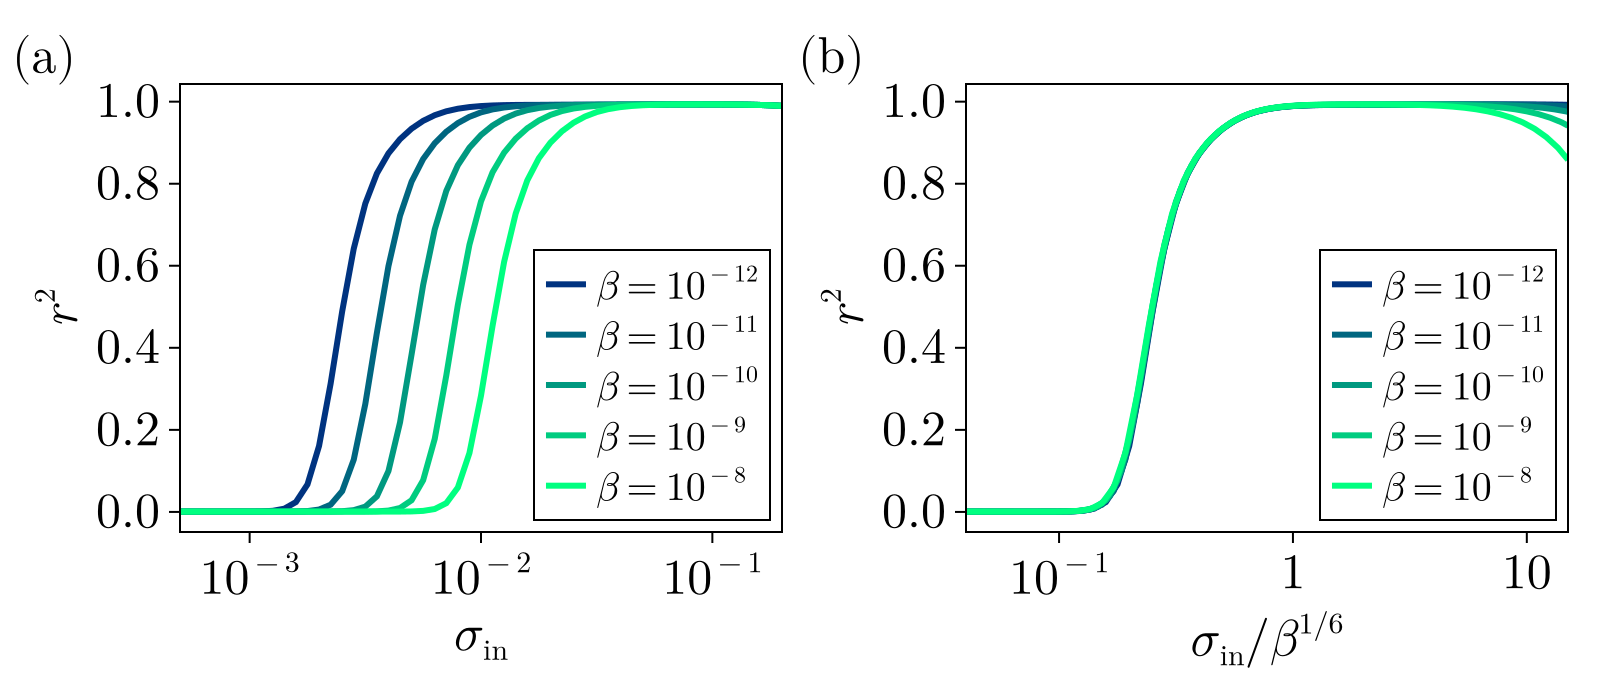

In [6]:
ax = Axis(fig[1, 2];
    xlabel=L"\sigma_{\mathrm{in}} / \beta^{1/6}",
    ylabel=L"r^2",
    xscale=log10,
    xticks=([1e-2, 1e-1, 1, 10], [L"10^{-2}", L"10^{-1}", L"1", L"10"]),
    yticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]))

xlims!(ax, 4e-2, 15)

lines!(ax, input_std_grid * (1e-12 ^ (-1/6)), r2_av_list[1], label=L"\beta = 10^{-12}", linewidth=3, color=RGBf(0, 0.2, 0.5))
lines!(ax, input_std_grid * (1e-11 ^ (-1/6)), r2_av_list[2], label=L"\beta = 10^{-11}", linewidth=3, color=RGBf(0, 0.4, 0.5))
lines!(ax, input_std_grid * (1e-10 ^ (-1/6)), r2_av_list[3], label=L"\beta = 10^{-10}", linewidth=3, color=RGBf(0, 0.6, 0.5))
lines!(ax, input_std_grid * (1e-9 ^ (-1/6)), r2_av_list[4], label=L"\beta = 10^{-9}", linewidth=3, color=RGBf(0, 0.8, 0.5))
lines!(ax, input_std_grid * (1e-8 ^ (-1/6)), r2_av_list[5], label=L"\beta = 10^{-8}", linewidth=3, color=RGBf(0, 1, 0.5))

axislegend(ax; position=:rb)

Label(fig[1, 2, TopLeft()], L"\mathrm{(b)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

fig

In [7]:
save("fig6_ridge_noise_scaling.pdf", fig)

CairoMakie.Screen{PDF}
